In [3]:
library(ape)
library(stepwise)
library(magrittr)
library(kdetrees)
library(phangorn)
source("recombination.R")

In [6]:
seqfilename <- "CRF7.fas"
outgroup <- "J_SE7887"

In [7]:
seqdata <- read.dna(seqfilename,format="fasta",as.matrix=TRUE)
seqdata

10 DNA sequences in binary format stored in a matrix.

All sequences of same length: 7894 

Labels: C_C2220 CRF7_C54A A_92UG037 B_JRFL D_NDK F_93BR020 ...

Base composition:
    a     c     g     t 
0.366 0.173 0.236 0.225 

In [8]:
seqdata.slide <- slidingWindowAlignment(seqdata,300,10)
length(seqdata.slide)

[1] 760

In [9]:
seqdata.slide.nj <- lapply(seqdata.slide,dist.dna,model="TN93",as.matrix=TRUE) %>%
  lapply(.,njs)

In [10]:
seqdata.slide.nj.kde <- kdetrees(seqdata.slide.nj,outgroup=outgroup)
seqdata.slide.nj.kde

Call: kdetrees(trees = seqdata.slide.nj, outgroup = outgroup)
Density estimates:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  915.4  2071.0  2364.0  2272.0  2531.0  2906.0 
Cutoff:  1380.953 

Outliers detected:
 [1] 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595
[20] 596 597 598 599 600 601 602 603 604 605

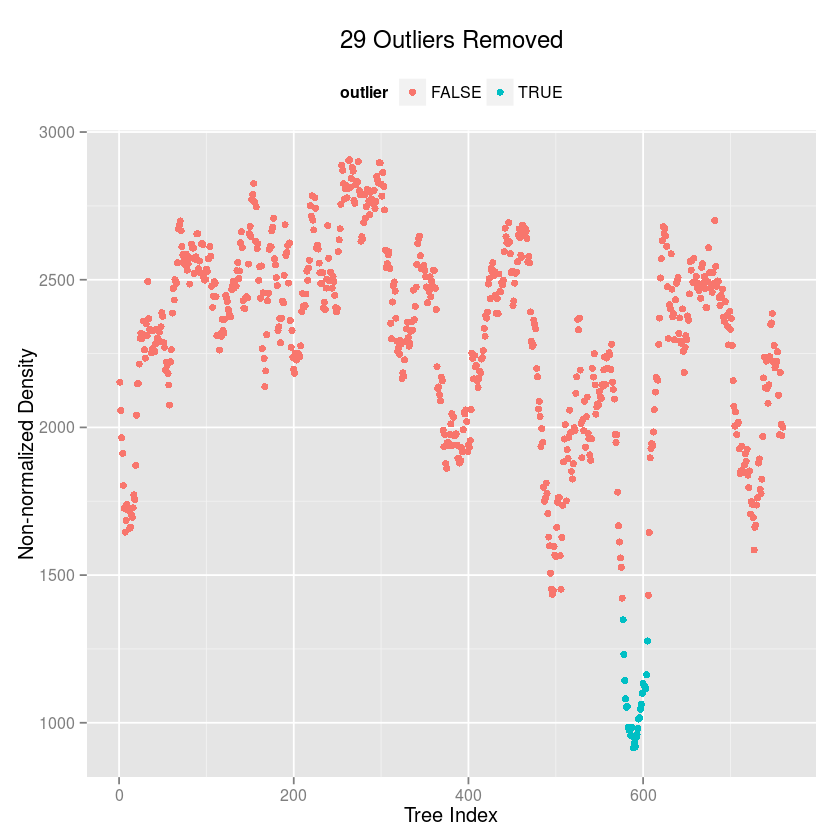

In [11]:
plot(seqdata.slide.nj.kde)